In [52]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
my_path = os.path.abspath('')
my_path = my_path.split('\\')
my_path_py = "\\".join(my_path[:-1])

In [53]:
df = pd.read_csv(my_path_py+'\\DatosRaw\\DEN_2015to2020.csv', sep=',')
clustersFB = pd.read_csv(my_path_py+"\\2_FeatureBased\\ClusterFB_Peru.csv", sep=',')
#clustersFB

In [54]:
df = df[df['Dep-Prov-Distrito']!= 'JUNIN, SATIPO, VIZCATAN DEL ENE']
df = df[df['Dep-Prov-Distrito']!= 'CUSCO, LA CONVENCION, VILLA KINTIARINA']

In [55]:
listaDistrito = df['Dep-Prov-Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print('Son ', len(listaDistrito), ' distritos')
listaDistrito.sort()

Son  503  distritos


In [56]:
lista_maxin = []
for d in listaDistrito:
    aux = df[['Dep-Prov-Distrito', 'Incidencia semanal', 'Año']]
    aux = aux[aux['Dep-Prov-Distrito']== d ]
    lista_maxin.append(sum(aux['Incidencia semanal'].values)/5)

df_p = pd.DataFrame()
df_p['Distrito'] = listaDistrito
df_p['Incidencia Media Acumulada'] = lista_maxin

In [57]:
limits = np.percentile(df_p['Incidencia Media Acumulada'], [0, 33, 66, 100])
limits

array([4.08671185e-02, 2.81488968e+01, 2.76853625e+02, 4.44828542e+03])

# INCIDENCIA BAJA

In [58]:
incidencia_baja = df_p[df_p['Incidencia Media Acumulada'] <= limits[1]]
incidencia_baja_lista = incidencia_baja['Distrito'].tolist()
#incidencia_baja_lista

In [59]:
aux_l = []
for i in incidencia_baja_lista:
    if(len(df[df['Dep-Prov-Distrito']== i])>200):
        aux_l.append(i)

In [60]:
import random
semanas_df = pd.DataFrame()
semanas_df['Semana'] = list(range(1,319)) 

In [61]:
muestras_baja=[]
for i in list(range(4)):
    d= aux_l[random.randint(0,len(aux_l)-1)]
    muestras_baja.append(d)
print(muestras_baja)

['CAJAMARCA, SAN IGNACIO, SAN IGNACIO', 'LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE', 'SAN MARTIN, MOYOBAMBA, CALZADA', 'SAN MARTIN, MOYOBAMBA, JEPELACIO']


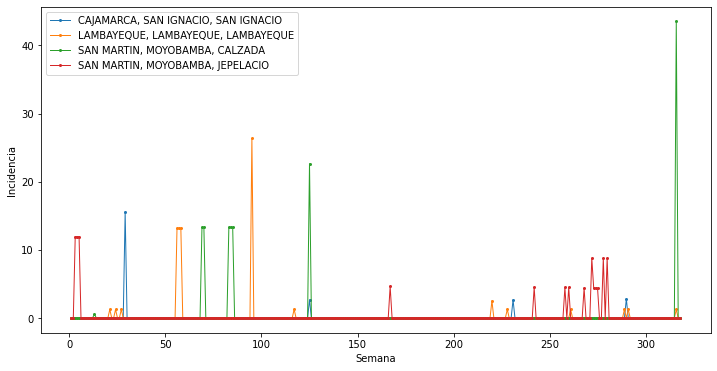

In [90]:
plt.figure(figsize=(12, 6))
for d in muestras_baja:
    aux = df[df['Dep-Prov-Distrito']== d]
    aux = pd.merge(semanas_df, aux, how="left", on=['Semana'])
    aux['Incidencia semanal'] = aux['Incidencia semanal'].replace(np.nan, 0)
    y = aux['Semana'].values
    x = aux['Incidencia semanal'].values
    plt.plot(y, x, label = d, lw=1, marker='o', ms=2)
plt.legend()
plt.xlabel('Semana')
plt.ylabel('Incidencia')
plt.savefig(my_path_py+'\\Pictures\\Incidencia_baja_Peru.png')
plt.show()


In [64]:
for d in muestras_baja:
    print(d)
    print(clustersFB[clustersFB['Dep-Prov-Distrito']==d]['Cluster KM Eu'].values)

CAJAMARCA, SAN IGNACIO, SAN IGNACIO
[0]
LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE
[0]
SAN MARTIN, MOYOBAMBA, CALZADA
[0]
SAN MARTIN, MOYOBAMBA, JEPELACIO
[0]


# INCIDENCIA MEDIA

In [67]:
incidencia_media = df_p[(df_p['Incidencia Media Acumulada'] > limits[1]) & (df_p['Incidencia Media Acumulada'] <= limits[2])]
incidencia_media_lista = incidencia_media['Distrito'].tolist()
#incidencia_media_lista

In [70]:
aux_l = []
for i in incidencia_media_lista:
    if(len(df[df['Dep-Prov-Distrito']== i])>250):
        aux_l.append(i)
        
muestras_media=[]
for i in list(range(4)):
    d= aux_l[random.randint(0,len(aux_l)-1)]
    muestras_media.append(d)
print(muestras_media)

['CAJAMARCA, JAEN, BELLAVISTA', 'LORETO, MAYNAS, ALTO NANAY', 'AYACUCHO, LA MAR, ANCO', 'SAN MARTIN, TOCACHE, POLVORA']


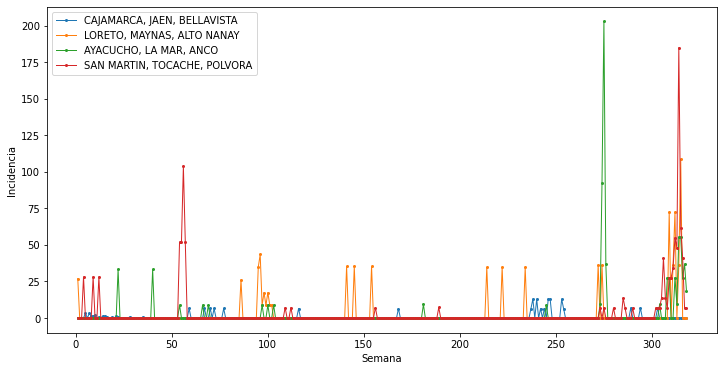

In [89]:
plt.figure(figsize=(12, 6))

for d in muestras_media:
    aux = df[df['Dep-Prov-Distrito']== d]
    aux = pd.merge(semanas_df, aux, how="left", on=['Semana'])
    aux['Incidencia semanal'] = aux['Incidencia semanal'].replace(np.nan, 0)
    y = aux['Semana'].values
    x = aux['Incidencia semanal'].values
    plt.plot(y, x, label = d, lw=1, marker='o', ms=2)
plt.legend()
plt.xlabel('Semana')
plt.ylabel('Incidencia')
plt.savefig(my_path_py+'\\Pictures\\Incidencia_media_Peru.png')
plt.show()


In [72]:
for d in muestras_media:
    print(d)
    print(clustersFB[clustersFB['Dep-Prov-Distrito']==d]['Cluster KM Eu'].values)

CAJAMARCA, JAEN, BELLAVISTA
[0]
LORETO, MAYNAS, ALTO NANAY
[0]
AYACUCHO, LA MAR, ANCO
[0]
SAN MARTIN, TOCACHE, POLVORA
[0]


# INCIDENCIA ALTA

In [79]:
incidencia_alta

,Distrito,Incidencia Media Acumulada
1,"AMAZONAS, BAGUA, BAGUA",506.823634
12,"AMAZONAS, UTCUBAMBA, BAGUA GRANDE",1085.849834
19,"ANCASH, CASMA, CASMA",1685.372007
21,"ANCASH, HUARMEY, HUARMEY",446.978300
22,"ANCASH, SANTA, CHIMBOTE",599.307829
...,...,...
496,"UCAYALI, CORONEL PORTILLO, YARINACOCHA",488.291329
498,"UCAYALI, PADRE ABAD, CURIMANA",351.657072
499,"UCAYALI, PADRE ABAD, IRAZOLA",400.387939
500,"UCAYALI, PADRE ABAD, NESHUYA",549.041092


In [80]:
incidencia_alta = df_p[df_p['Incidencia Media Acumulada'] > limits[2]]
incidencia_alta_lista = incidencia_alta['Distrito'].tolist()
#incidencia_alta_lista

In [82]:
aux_l = []
for i in incidencia_alta_lista:
    if(len(df[df['Dep-Prov-Distrito']== i])>260):
        aux_l.append(i)
        
muestras_alta=[]
for i in list(range(4)):
    d= aux_l[random.randint(0,len(aux_l)-1)]
    muestras_alta.append(d)
print(muestras_alta)

['LORETO, REQUENA, REQUENA', 'LORETO, MAYNAS, FERNANDO LORES', 'PIURA, MORROPON, CHULUCANAS', 'MADRE DE DIOS, TAMBOPATA, LABERINTO']


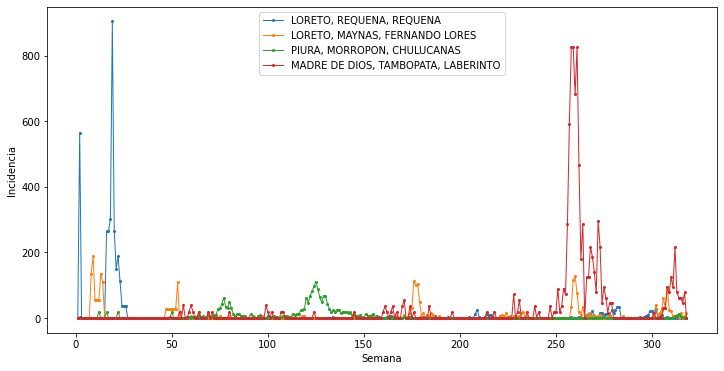

In [88]:
plt.figure(figsize=(12, 6))

for d in muestras_alta:
    aux = df[df['Dep-Prov-Distrito']== d]
    aux = pd.merge(semanas_df, aux, how="left", on=['Semana'])
    aux['Incidencia semanal'] = aux['Incidencia semanal'].replace(np.nan, 0)
    y = aux['Semana'].values
    x = aux['Incidencia semanal'].values
    plt.plot(y, x, label = d, lw=1, marker='o', ms=2)
plt.legend()
plt.xlabel('Semana')
plt.ylabel('Incidencia')
plt.savefig(my_path_py+'\\Pictures\\Incidencia_alta_Peru.png')
plt.show()


In [85]:
clusters_muestras_altas = []
for d in muestras_alta:
    print(d)
    print(clustersFB[clustersFB['Dep-Prov-Distrito']==d]['Cluster KM Eu'].values)

LORETO, REQUENA, REQUENA
[0]
LORETO, MAYNAS, FERNANDO LORES
[0]
PIURA, MORROPON, CHULUCANAS
[0]
MADRE DE DIOS, TAMBOPATA, LABERINTO
[0]


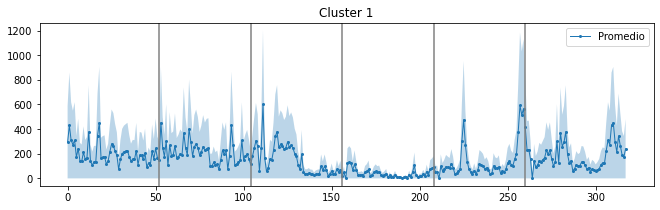

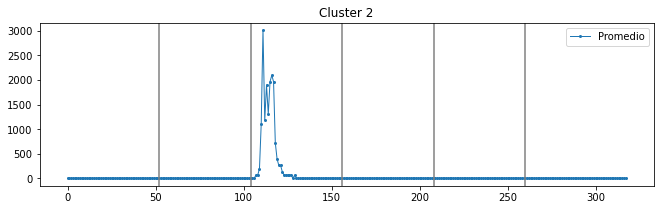

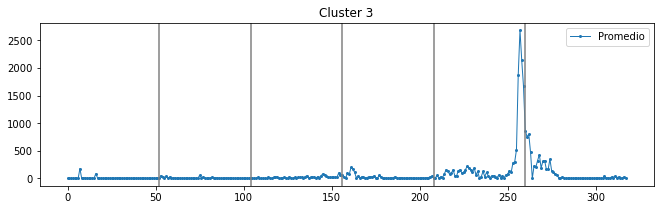

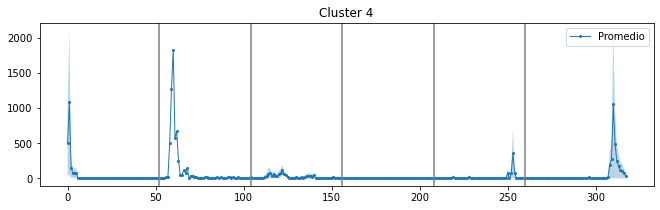

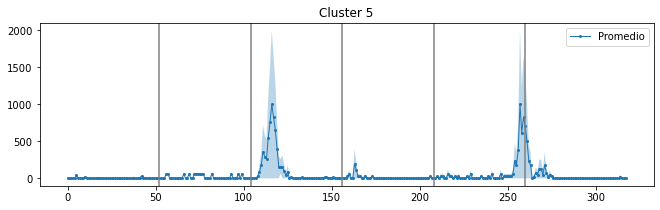

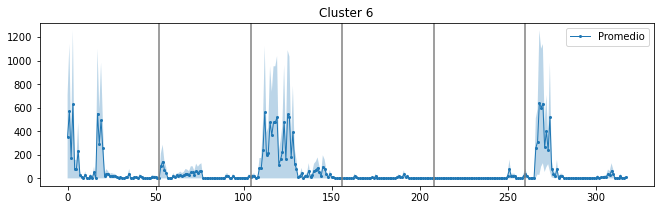

In [100]:
import random

for i in list(range(6)):
    aux = clustersFB[clustersFB['Cluster KM Eu']== i]['Dep-Prov-Distrito'].values
    aux2 = df[df['Dep-Prov-Distrito'].isin(aux.tolist())]
    minimo= []
    maximo = []
    media = []
    for j in list(range(1,319)):
        aux3 = aux2[aux2['Semana']==j]['Incidencia semanal'].values
        if (len(aux3)>0):
            minimo.append(min(aux3))
            maximo.append(max(aux3))
            media.append((max(aux3)+min(aux3))/2)
        else:
            minimo.append(-1)
            maximo.append(1)
            media.append(0.5)
    fig, ax = plt.subplots(figsize=(11, 3))
    #ax.plot(list(range(len(minimo))), minimo,'-')
    #ax.plot(list(range(len(maximo))), maximo,'-')
    ax.fill_between(list(range(len(minimo))), minimo, maximo, alpha=0.3)
    #d = aux[random.randint(0,len(aux)-1)]
    #print(d)
    #aux = df[df['Distrito']== d]
    #aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
    #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
    #y = aux['semana'].values
    #x = aux['incidencia'].values
    ax.plot(list(range(len(media))), media,  label = 'Promedio', lw=1, marker='o', ms=2)
    ax.legend()
    plt.axvline(x = 52, color = 'grey', label = 'Fin primer año')
    plt.axvline(x = 52*2, color = 'grey', label = 'Fin segundo año')
    plt.axvline(x = 52*3, color = 'grey', label = 'Fin tercer año')
    plt.axvline(x = 52*4, color = 'grey', label = 'Fin cuarto año')
    plt.axvline(x = 52*5, color = 'grey', label = 'Fin quinto año')
    #plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
    plt.title('Cluster '+str(i+1))
    plt.savefig(my_path_py+'\\Pictures\\Promedio'+str(i)+'Peru')
plt.show()